

# Brain and Machine Learning Midterm

 김우찬




In [1037]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#0. Create Data Set
---
##0-1) Import the csv file and put it in the dataframe.

In [1038]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#I uploaded csv file to my github repository. 
face_data = pd.read_csv('https://raw.githubusercontent.com/kwc620/csv_file/main/facial_expression_train_dataset.csv')
face_data.head()

,Class Label,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22
0,1,4.1231,2.8284,6.0828,8.6023,5.0000,3.0000,5.0000,3.6056,8.6023,8.0000,9.2195,4.0000,9.0554,8.9443,5.0990,4.1231,11.0454,8.6023,4.1231,14.8661,14.0000,15.2315
1,1,6.3246,5.0000,7.6158,6.0828,4.2426,2.2361,6.4031,4.4721,8.9443,7.0711,10.4403,6.0828,12.0416,9.2195,3.6056,13.3417,12.1655,11.4018,4.1231,17.7200,16.0312,19.7231
2,1,5.6569,5.6569,8.5440,5.0000,3.1623,3.0000,10.0000,3.6056,10.2956,6.0828,11.0454,6.0000,11.0454,7.0711,7.6158,7.2111,14.3178,8.6023,6.3246,20.5913,17.4642,18.9737
3,1,12.0416,13.3417,8.9443,11.1803,8.4853,6.4031,4.0000,5.8310,6.0828,11.7047,9.2195,2.0000,13.3417,9.0000,6.0000,4.1231,1.4142,4.0000,8.9443,10.1980,7.6158,13.0384
4,1,10.0000,14.1421,13.6015,12.0830,9.8995,7.0711,4.4721,9.8489,5.0000,4.4721,4.1231,5.3852,8.0000,6.4031,6.0000,7.2801,7.8102,5.3852,8.6023,10.4403,9.2195,13.8924


##0-2) Through .info(), we can check there is not null-value
###in this dataframe, there is no null-value, so we don't have to do data cleaning process.

### Also, there are only int variable we don't need to do data processing.

In [1039]:
face_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class Label  87 non-null     int64  
 1   Feature 1    87 non-null     float64
 2   Feature 2    87 non-null     float64
 3   Feature 3    87 non-null     float64
 4   Feature 4    87 non-null     float64
 5   Feature 5    87 non-null     float64
 6   Feature 6    87 non-null     float64
 7   Feature 7    87 non-null     float64
 8   Feature 8    87 non-null     float64
 9   Feature 9    87 non-null     float64
 10  Feature 10   87 non-null     float64
 11  Feature 11   87 non-null     float64
 12  Feature 12   87 non-null     float64
 13  Feature 13   87 non-null     float64
 14  Feature 14   87 non-null     float64
 15  Feature 15   87 non-null     float64
 16  Feature 16   87 non-null     float64
 17  Feature 17   87 non-null     float64
 18  Feature 18   87 non-null     float64
 19  Feature 19

###0-3) Through .describe(), we can get int variable information.

In [1040]:
face_data.describe()

,Class Label,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22
count,87.00000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,2.00000,8.483087,10.247121,10.274905,10.636085,5.605470,4.713333,5.513524,5.141545,4.906726,5.160431,5.284410,5.538985,7.738580,7.626924,13.161087,17.266584,20.520015,17.246136,13.738169,9.934930,8.759992,10.173441
std,0.82123,6.938463,7.531868,7.968037,8.441328,3.660518,3.658772,3.912258,3.527501,4.012182,3.797473,3.866263,4.512017,4.428974,4.797308,7.096800,12.710225,18.933429,13.425790,6.836856,5.156688,4.514630,5.129261
min,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.414200,0.000000,0.000000,2.000000,4.123100,1.414200,1.000000,2.000000
25%,1.00000,3.605600,4.736050,5.000000,4.736050,3.000000,2.236100,3.162300,3.000000,2.236100,2.914200,2.236100,2.236100,4.357350,3.162300,7.615800,8.543800,7.440650,8.573150,7.839050,6.082800,5.099000,5.956900
50%,2.00000,7.071100,7.810200,8.062300,7.615800,5.000000,4.123100,5.000000,4.242600,4.123100,4.242600,4.242600,4.123100,7.071100,7.071100,12.165500,13.601500,12.165500,11.704700,12.206600,9.219500,7.810200,9.486800
75%,3.00000,12.041600,14.229950,13.379050,15.264300,7.071100,5.385200,6.708200,6.082800,5.521050,6.082800,7.071100,7.413450,10.408350,9.667850,15.967950,21.861450,28.547750,21.628100,19.170200,13.800750,12.287950,14.017250
max,3.00000,35.128300,36.013900,40.162200,40.025000,18.439100,18.439100,20.396100,19.924900,19.646900,20.099800,18.110800,24.515300,18.439100,20.248500,30.265500,53.084800,64.124900,51.088200,29.000000,20.591300,21.587000,21.587000


#1.Data split(train-validation-test)

For the systemic approach, we are going to split the data with the set of **train, validation, test** with the various ratio.

For the equational distribution of each class, we are going to split the data by label first.

Then, for testing the various set of split dataset, we are going to define the function that split the dataset as assigned ratio.

For each data by classes, the dataset will be assigned by randomly for every splitted data.

---

## class Dataset

### Methods

#### Function distributeData()
> This function distributes the data by each classes.

#### Function splitData(train_num, valid_num, test_num)

> The ratios of spliting data is following.

### Ratios

#### First Ratio

1. Train: 70% - 61 data
2. Validation: 15% - 13 data
3. Test: 15% - 13 data

#### Second Ratio

1. Train: 80% - 69 data
2. Validation: 10% - 9 data
3. Test: 10% - 9 data

#### Third Ratio

1. Train: 65% - 57 data
2. Validation: 17.5% - 15 data
3. Test: 17.5% - 15 data

In [1041]:
import random

random.seed(100)

class Dataset():
  def __init__(self, originalData):
    self.data = originalData
    self.angryData = self.distributeData()[0]
    self.happyData = self.distributeData()[1]
    self.surprisedData = self.distributeData()[2]
    self.firstRatioData = self.generateData()[0]
    self.secondRatioData = self.generateData()[1]
    self.thirdRatioData = self.generateData()[2]

  def distributeData(self):
    angry = []
    happy = []
    surprise = []

    for i, label in enumerate(self.data['Class Label']):
      if(label == 1):
        angry.append(self.data.iloc[i, :])
      elif(label == 2):
        happy.append(self.data.iloc[i, :])
      elif(label == 3):
        surprise.append(self.data.iloc[i, :])

    return angry, happy, surprise


  def splitData(self, split):
    train = []
    valid = []
    test = []
    if(split == 'first'):
      train = train + random.sample(self.angryData, 21)
      train = train + random.sample(self.happyData, 20)
      train = train + random.sample(self.surprisedData, 20)
      random.shuffle(train)
      valid = valid + random.sample(self.angryData, 5)
      valid = valid + random.sample(self.happyData, 4)
      valid = valid + random.sample(self.surprisedData, 4)
      random.shuffle(valid)
      test = test + random.sample(self.angryData, 5)
      test = test + random.sample(self.happyData, 4)
      test = test + random.sample(self.surprisedData, 4)
      random.shuffle(test)
      return {'train': train, 'valid': valid, 'test': test}
    elif(split == 'second'):
      train = train + random.sample(self.angryData, 23)
      train = train + random.sample(self.happyData, 23)
      train = train + random.sample(self.surprisedData, 23)
      random.shuffle(train)
      valid = valid + random.sample(self.angryData, 3)
      valid = valid + random.sample(self.happyData, 3)
      valid = valid + random.sample(self.surprisedData, 3)
      random.shuffle(valid)
      test = test + random.sample(self.angryData, 3)
      test = test + random.sample(self.happyData, 3)
      test = test + random.sample(self.surprisedData, 3)
      random.shuffle(test)
      return {'train': train, 'valid': valid, 'test': test}
    elif(split == 'third'):
      train = train + random.sample(self.angryData, 19)
      train = train + random.sample(self.happyData, 19)
      train = train + random.sample(self.surprisedData, 19)
      random.shuffle(train)
      valid = valid + random.sample(self.angryData, 5)
      valid = valid + random.sample(self.happyData, 5)
      valid = valid + random.sample(self.surprisedData, 5)
      random.shuffle(valid)
      test = test + random.sample(self.angryData, 5)
      test = test + random.sample(self.happyData, 5)
      test = test + random.sample(self.surprisedData, 5)
      random.shuffle(test)
      return {'train': train, 'valid': valid, 'test': test}

  def generateData(self):
    datasets = [self.splitData('first'), self.splitData('second'), self.splitData('third')]
    splits = ['train', 'valid', 'test']
    output = []
    for dataset in datasets:
      datas = {}
      for split in splits:
        frame = pd.DataFrame(dataset[split])
        labels = frame['Class Label'].to_numpy()
        data = frame.iloc[:, 1:].to_numpy()
        datas[split] = {'x': data, 'y': labels}
      output.append(datas)

    return output
    

dataset = Dataset(face_data)

#print(len(dataset.angryData))
#print(len(dataset.happyData))
#print(len(dataset.surprisedData))

firstRatioData = dataset.firstRatioData
secondRatioData = dataset.secondRatioData
thirdRatioData = dataset.thirdRatioData

#print(firstRatioData)
#print(secondRatioData['train'])
#print(thirdRatioData)

## Example of using Custom Data

Using dataset of splitted by first ratio. (train = 70%, valid = 15%, test = 15%)

In [1042]:
x_train = firstRatioData['train']['x']
y_train = firstRatioData['train']['y']

x_valid = firstRatioData['valid']['x']
y_valid = firstRatioData['valid']['y']

x_test = firstRatioData['test']['x']
y_test = firstRatioData['test']['y']

x_train.shape

(61, 22)

####We can check 3class ratio is equal in y_train set.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


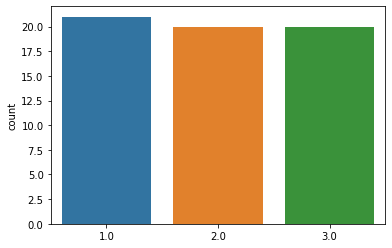

In [1043]:
import seaborn as sns

sns.countplot(y_train)

---
#2. Model Training and Hyperparameter tuning by grid search

## I will use three algorithms.

#### 1) Decision Tree
#### 2) KNN
#### 3) SVM(Support Vector Machine)



In [1044]:
from sklearn.model_selection import GridSearchCV

##2-1) Decision Tree

In [1045]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

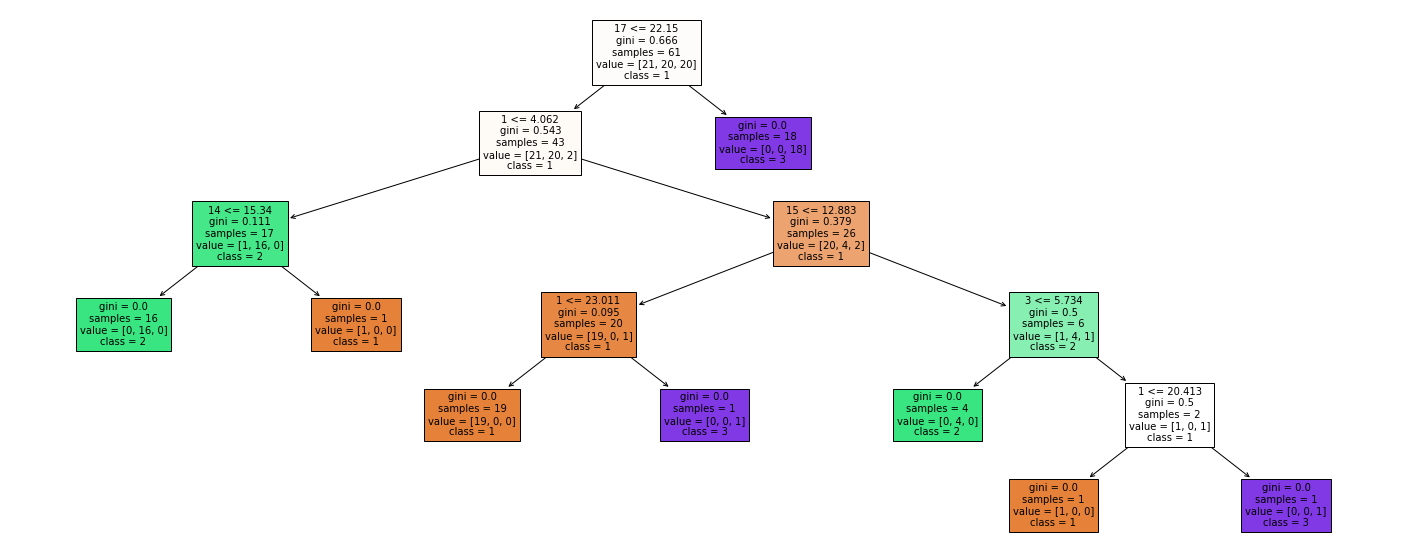

In [1046]:
dt = DecisionTreeClassifier()
dt_clf = dt.fit(x_train, y_train)
fig=plt.figure(figsize=(25,10))
x_train = pd.DataFrame(x_train, columns=[*range(1, 23)])
a=plot_tree(dt_clf, class_names=['1','2', '3'], feature_names=x_train.columns, filled=True, fontsize=10)

In [1047]:
parameters = {'max_depth': [3, 5, 7, 10], 'criterion': ('gini', 'entropy')}

dt = DecisionTreeClassifier(random_state=0)
clf_dt = GridSearchCV(dt, parameters)
clf_dt.fit(x_train, y_train)
cvres = clf_dt.cv_results_

In [1048]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

0.803846153846154 {'criterion': 'gini', 'max_depth': 3}
0.8192307692307693 {'criterion': 'gini', 'max_depth': 5}
0.8192307692307693 {'criterion': 'gini', 'max_depth': 7}
0.8192307692307693 {'criterion': 'gini', 'max_depth': 10}
0.8025641025641026 {'criterion': 'entropy', 'max_depth': 3}
0.8666666666666668 {'criterion': 'entropy', 'max_depth': 5}
0.8666666666666668 {'criterion': 'entropy', 'max_depth': 7}
0.8666666666666668 {'criterion': 'entropy', 'max_depth': 10}


##Grid Search Result
### Hyperparameter tuning to Decision Tree Classifier

Grid Searched Hyperparameters

- criterion
- max_depth

We can get insight that entropy is more precise  than gini.
Also, max_depths make same accuracy after 5, so we can get insight that 5th is best parameter in max_depth.

In [1049]:
# Final Model
Final_DT = DecisionTreeClassifier(max_depth=5, criterion='entropy')
Final_DT.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##2-2) KNN

In [1050]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [3, 5, 7], 'weights': ('uniform', 'distance'), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': [30, 40, 50]}

knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, parameters)
clf_knn.fit(x_train, y_train)
cvres = clf_knn.cv_results_

In [1051]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)
  #if mean_score == 1:
   #print(params)

1.0 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3, 'weights': 'uniform'}
1.0 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3, 'weights': 'distance'}
0.9833333333333332 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'uniform'}
0.9833333333333332 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}
0.95 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}
0.9833333333333332 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'distance'}
1.0 {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 3, 'weights': 'uniform'}
1.0 {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 3, 'weights': 'distance'}
0.9833333333333332 {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 5, 'weights': 'uniform'}
0.9833333333333332 {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 5, 'weights': 'distance'}
0.95 {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 7, 'weights': 'uniform'}
0.983

##Grid Search Result
### Hyperparameter tuning to KNN Classifier

Grid Searched Hyperparameters

- n_neighbors
- weights
- algorithm
- leaf_size

####Without n_neighbors, others parameters don't effect the accuracy. 
####Also, when n_neighbors is Three, Accuracy becomes highest.

In [1052]:
# Final Model
Final_KNN = KNeighborsClassifier(n_neighbors=3)
Final_KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

##2-3) SVM(SVC)

In [1053]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'gamma': ('scale', 'auto'), 'degree': [3, 5, 7]}
svc = svm.SVC()
clf_svc = GridSearchCV(svc, parameters)
clf_svc.fit(x_train, y_train)
cvres = clf_svc.cv_results_

In [1054]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

1.0 {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
1.0 {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
1.0 {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
0.541025641025641 {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
1.0 {'C': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'linear'}
1.0 {'C': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'rbf'}
1.0 {'C': 1, 'degree': 5, 'gamma': 'auto', 'kernel': 'linear'}
0.541025641025641 {'C': 1, 'degree': 5, 'gamma': 'auto', 'kernel': 'rbf'}
1.0 {'C': 1, 'degree': 7, 'gamma': 'scale', 'kernel': 'linear'}
1.0 {'C': 1, 'degree': 7, 'gamma': 'scale', 'kernel': 'rbf'}
1.0 {'C': 1, 'degree': 7, 'gamma': 'auto', 'kernel': 'linear'}
0.541025641025641 {'C': 1, 'degree': 7, 'gamma': 'auto', 'kernel': 'rbf'}
1.0 {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
1.0 {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
1.0 {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
0.5743589743589743 {'C'

In [1055]:
clf_svc.best_params_

{'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

##Gric Search Result
### Hyperparameter tuning to SVM Classifier

Grid Searched Hyperparameters

- C
- Kernel

rbf has always return low scores

when 'C'=1 and 'kernel' is 'linear', accuracy becomes highest.

In [1056]:
# Final Model
Final_SVM = svm.SVC(C = 10, degree= 7, gamma= 'auto')
Final_SVM.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=7, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

---
#3. Evaluating Models

I will evaluate model's accuracy with 3 methods.

- F-Score
- Precision
- Recall

## F-Score

### Decision Tree F1 *Score*

In [1057]:
from sklearn.metrics import f1_score

dt_prediction = Final_DT.predict(x_valid)
f1_score(y_valid, dt_prediction, average='macro')

0.9220779220779219

### KNN F1 *Score*

In [1058]:
knn_prediction = Final_KNN.predict(x_valid)
f1_score(y_valid, knn_prediction, average='macro')

1.0

### SVM F1 *Score*

In [1059]:
svc_prediction = Final_SVM.predict(x_valid)
f1_score(y_valid, svc_prediction, average='macro')

1.0

### Precision

In [1060]:
from sklearn.metrics import precision_score

precision_score(y_valid, dt_prediction, average='macro')

0.9444444444444445

In [1061]:
precision_score(y_valid, knn_prediction, average='macro')

1.0

In [1062]:
precision_score(y_valid, svc_prediction, average='macro')

1.0

### Recall

In [1063]:
from sklearn.metrics import recall_score

recall_score(y_valid, dt_prediction, average='macro')

0.9166666666666666

In [1064]:
recall_score(y_valid, knn_prediction, average='macro')

1.0

In [1065]:
recall_score(y_valid, svc_prediction, average='macro')

1.0

#Evaluation Method

This method evaluates my best model scores with accuracy with F1-marco.
Also, it makes download of pickle weight file.

In [1066]:
best_model =  Final_KNN

In [1071]:
import pickle
from joblib import dump, load
from google.colab import files

def test_evaluation(test_samples, test_labels):
  
  knn_prediction = best_model.predict(test_samples)
  mF1 = f1_score(test_labels, knn_prediction, average='macro')
  recall = recall_score(test_labels, knn_prediction, average='macro')

  #save model with file and download
  dump(best_model, 'svc_kwch.pkl')
  files.download('svc_kwch.pkl')

  return mF1, recall

# Evaluation Script

### This Evaluation proceed three TEST dataset along to THREE different RATIO.

Following three datasets defined above the report.

### FIRST Dataset with split ratio of (train: 70% valid: 15% test: 15%)

- F1 Marco: 1.0
- recall accuracy score: 1.0



In [1073]:
x_test_1 = firstRatioData['test']['x']
y_test_1 = firstRatioData['test']['y']

mF1_1 = test_evaluation(x_test_1, y_test_1)
print(mF1_1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1.0, 1.0)


### SECOND Dataset with split ratio of (train: 80% valid: 10% test: 10%)

- F1 Marco: 1.0
- recall accuracy score: 1.0

In [1069]:
x_test_2 = secondRatioData['test']['x']
y_test_2 = secondRatioData['test']['y']

mF1_2 = test_evaluation(x_test_2, y_test_2)
print(mF1_2)

(1.0, 1.0)


### THIRD Dataset with split ratio of (train: 85% valid: 17.5% test: 17.5%)

- F1 Marco: 1.0
- recall accuracy score: 1.0

In [1070]:
x_test_3 = thirdRatioData['test']['x']
y_test_3 = thirdRatioData['test']['y']

mF1_3 = test_evaluation(x_test_3, y_test_3)
print(mF1_3)

(1.0, 1.0)


#5. Summarize
---

##5-0. Preprocessing and Data Exploration

1.   Because of no null-value in Dataframe, we don't need to do data cleaning. 

##5-1. Data split



1.   I make 3 Data split cases. 
#####(1) Train, Validation, Test = 70%, 15%, 15%
#####(2) Train, Validation, Test = 80%, 10%, 10%
#####(3) Train, Validation, Test = 65%, 17.5%, 17.5%
2.   After choosing model, these three cases will be scored by test set.




##5-2. Create models


1.   I did create 3 model(Decision Tree, KNN, SVM), and SVM.
2.   When I do grid search each models, I can realize DecisionTree has low accuracy.
3.  SVC has only overfitted scores or underfitted score.
4. Knn shows the most accurate accuracy among the three models.


##5-3. Accuracy Scores of Each models


1.  DecisionTree has low accuracy scores. 
2.  KNN and SVC have highest scores.



##5-4. Best model and its data split ratio.

> As a result of comparing the three training, validation, and test sets, we can realize there aren't much of differences. So, I can use any of these three sets.






#6. Conclusion



1.   The train, validation and test ratio does not significantly affect the outcome.
2.   DecisionTree has low accurate than others models.
3. SVC has only overfitted or underfitted scorce. (When we do grid search, we can realize it.)
4. KNN has reasonable accuracy score.

##So, I chose KNN model, and I just take FIRST Dataset with split ratio of (train: 70% valid: 15% test: 15%)

